In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from collections import Counter
import seaborn as sns
from sklearn import metrics
from sklearn.datasets import make_blobs


In [2]:
df=pd.read_csv(r"C:\Users\lenovo\Desktop\praxis\archive\Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
x=np.array(df['Spending Score (1-100)'])
y=np.array(df['Annual Income (k$)'])

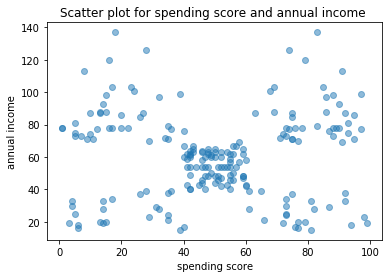

In [10]:
plt.scatter(x, y, alpha=0.5)
plt.title('Scatter plot for spending score and annual income ')
plt.xlabel('spending score')
plt.ylabel('annual income')
plt.show()

In [11]:
dbscan_data=df[['Spending Score (1-100)','Annual Income (k$)']]
dbscan_data=dbscan_data.values.astype('float32',copy=False)
dbscan_data

array([[ 39.,  15.],
       [ 81.,  15.],
       [  6.,  16.],
       [ 77.,  16.],
       [ 40.,  17.],
       [ 76.,  17.],
       [  6.,  18.],
       [ 94.,  18.],
       [  3.,  19.],
       [ 72.,  19.],
       [ 14.,  19.],
       [ 99.,  19.],
       [ 15.,  20.],
       [ 77.,  20.],
       [ 13.,  20.],
       [ 79.,  20.],
       [ 35.,  21.],
       [ 66.,  21.],
       [ 29.,  23.],
       [ 98.,  23.],
       [ 35.,  24.],
       [ 73.,  24.],
       [  5.,  25.],
       [ 73.,  25.],
       [ 14.,  28.],
       [ 82.,  28.],
       [ 32.,  28.],
       [ 61.,  28.],
       [ 31.,  29.],
       [ 87.,  29.],
       [  4.,  30.],
       [ 73.,  30.],
       [  4.,  33.],
       [ 92.,  33.],
       [ 14.,  33.],
       [ 81.,  33.],
       [ 17.,  34.],
       [ 73.,  34.],
       [ 26.,  37.],
       [ 75.,  37.],
       [ 35.,  38.],
       [ 92.,  38.],
       [ 36.,  39.],
       [ 61.,  39.],
       [ 28.,  39.],
       [ 65.,  39.],
       [ 55.,  40.],
       [ 47.,

In [11]:
df.head()
df['Genre']=pd.get_dummies(df['Genre'])

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
#dbscan=DBSCAN(eps=.3,min_samples=5)
dbscan=DBSCAN(eps=9,min_samples=4)
pred=dbscan.fit(dbscan_data)

In [13]:
outlier_df=df[dbscan.labels_ ==-1]
cluster_df=df[dbscan.labels_ !=-1]
colors=dbscan.labels_
colors_clusters=colors[colors !=-1]
color_clusters= 'black'
##
clusters=Counter(dbscan.labels_)
print(clusters)
print(dbscan_data[dbscan.labels_ ==-1])
print('no of clusters={}'.format(len(clusters)-1))

Counter({3: 89, 4: 32, 5: 23, 0: 17, -1: 16, 1: 12, 2: 7, 6: 4})
[[ 94.  18.]
 [ 99.  19.]
 [ 98.  23.]
 [ 92.  38.]
 [ 39.  99.]
 [ 97.  99.]
 [ 68. 101.]
 [ 69. 103.]
 [  8. 113.]
 [ 91. 113.]
 [ 16. 120.]
 [ 79. 120.]
 [ 28. 126.]
 [ 74. 126.]
 [ 18. 137.]
 [ 83. 137.]]
no of clusters=7


In [ ]:
fig=plt.figure()
ax=fig.add_axes([.1,.1,1,1])
ax.scatter(cluster_df['Spending Score (1-100)'],cluster_df['Annual Income (k$)'],
            c=color_clusters,edgecolor='black',s=50)
ax.scatter(outlier_df['Spending Score (1-100)'],outlier_df['Annual Income (k$)'],
            c=color_clusters,edgecolor='black',s=50)
ax.set_xlabel('Spending Score (1-100)')
ax.set_ylabel('Annual Income (k$)')
plt.title('clustered Annual income basis of spending score')
plt.grid(which='major',color='blue',alpha=.45)
plt.show()

In [14]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(dbscan_data)
distances, indices = nbrs.kneighbors(dbscan_data)

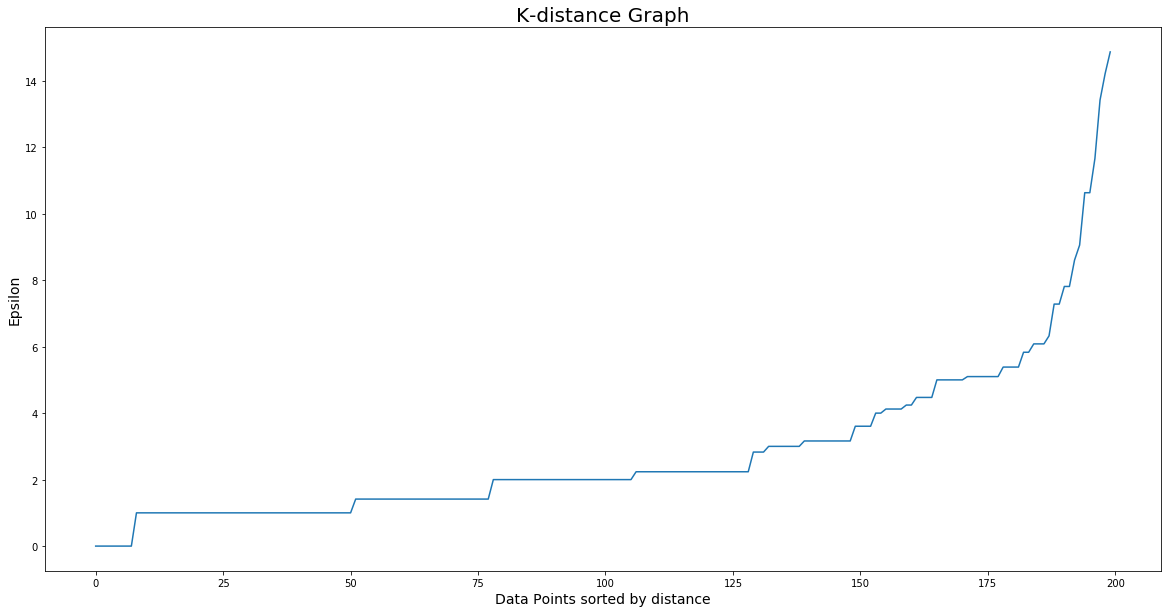

In [15]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [17]:
df['DBSCAN_opt_labels']=dbscan.labels_
df['DBSCAN_opt_labels'].value_counts()

 3    89
 4    32
 5    23
 0    17
-1    16
 1    12
 2     7
 6     4
Name: DBSCAN_opt_labels, dtype: int64

In [29]:
anom_index = np.where(pred == -1)
values = x[anom_index]
df.head()
labels=dbscan.labels_

Text(0.5, 1.0, 'DBSCAN')

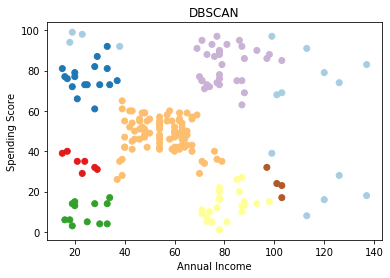

In [19]:
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'],c=predicted_labels, cmap='Paired')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title("DBSCAN")

In [30]:
db_data=pd.DataFrame(data=dbscan_data)

In [32]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(db_data, labels))

Estimated number of clusters: 7
Estimated number of noise points: 16
Silhouette Coefficient: 0.426
